In [25]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
DB = '../data/checking-logs.sqlite'

In [27]:
conn = sqlite3.connect(DB)
query = """
SELECT uid, timestamp, numTrials
FROM checker
WHERE
    uid LIKE 'user_%' AND
    status = 'ready' AND
    labname = 'project1'
"""
data = pd.read_sql(query,conn)
data['timestamp'] = pd.to_datetime(data['timestamp']).dt.date
data = data.groupby(['uid','timestamp']).max()
data = data.sort_values(['uid','timestamp'])
data.head(50)

numTrials
uid     timestamp            
user_1  2020-05-14         11
user_10 2020-05-12          7
        2020-05-13         21
        2020-05-14         59
user_11 2020-05-03          1
user_12 2020-05-14          4
user_13 2020-05-11          2
        2020-05-12         30
        2020-05-14         32
user_14 2020-05-05          1
        2020-05-09         18
        2020-05-10         25
        2020-05-11         49
        2020-05-12         92
        2020-05-14         99
user_15 2020-05-14          3
user_16 2020-05-12          3
        2020-05-14         10
user_17 2020-04-18          1
        2020-05-12          3
        2020-05-14          6
user_18 2020-05-11          7
        2020-05-13          8
        2020-05-14         31
user_19 2020-05-14         25
        2020-05-15         29
user_2  2020-05-05         57
        2020-05-06         58
        2020-05-10         62
        2020-05-11         74
        2020-05-12         78
        2020-05-13         93
        2020-05-14         95
user_20 2020-05-11         11
        2020-05-14         54
user_21 2020-05-10          7
        2020-05-14          9
user_22 2020-05-03          1
        2020-05-14          2
user_24 2020-05-13          9
        2020-05-14         34
user_25 2020-05-08          5
        2020-05-09         27
        2020-05-10         29
        2020-05-11         33
        2020-05-12         54
        2020-05-13         57
        2020-05-14         77
user_26 2020-05-10         35
        2020-05-13         52

In [28]:
custom_palette = [
    '#1f77b4', '#000000', '#4700c1', '#d62728', '#f3ff09',
    '#7a0085', '#e377c2', '#875B46', '#bcbd22', '#495055',
    '#17becf', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b',
    '#e7969c', '#aec7e8', '#ffbb78', '#98df8a', '#c5b0d5',
    '#c49c94', '#f7b6d2', '#dbdb8d', '#9edae5', '#393b79',
    '#637939', '#8c6d31'
]

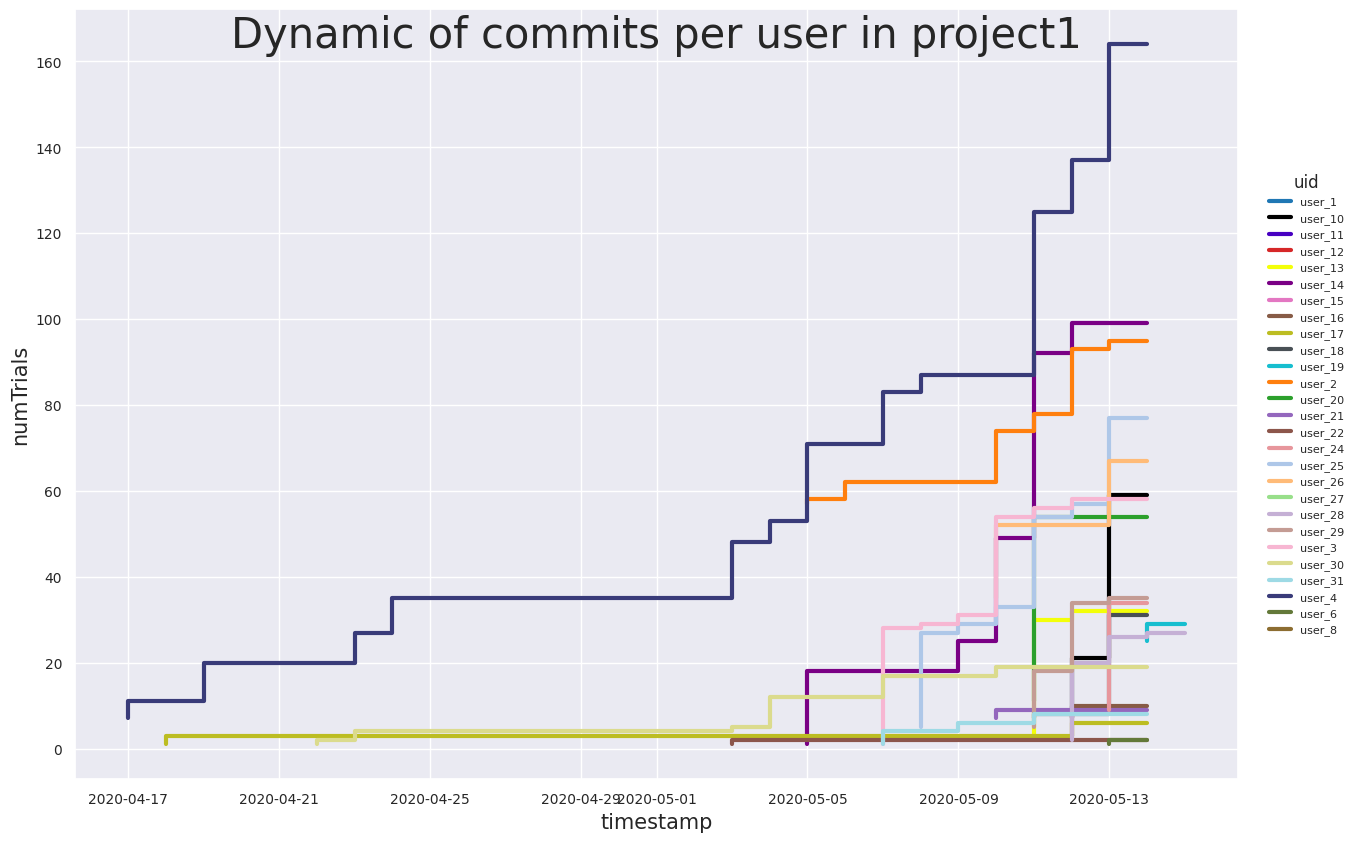

In [29]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,10))
sns.lineplot(data=data,
             x = 'timestamp',
             y = 'numTrials',
             hue='uid',
             drawstyle ='steps-pre',
             palette=custom_palette,
             linewidth = 3)

plt.xlabel('timestamp',fontsize = 15)
plt.ylabel('numTrials',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title("Dynamic of commits per user in project1",fontsize = 30,x=0.5,y=0.94)
legend = plt.legend(
    bbox_to_anchor=(1.1, 0.8),  
    loc='upper right',          
    title='uid', 
    fontsize = 8                
)
legend.set_frame_on(False)
plt.show()

Which user was the leader in the number of commits almost all of the time?

The answer: user_4.

Which user was the leader for only a short period of time?

The answer: user_2.